In [1]:
# Dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#banking_file = os.path.join( 'new_train.csv')
banking_df = pd.read_csv('new_train.csv')
banking_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


In [3]:
clean_df_1 = banking_df.loc[banking_df['job']   != 'unknown']
clean_df_2 = clean_df_1.loc[clean_df_1['marital']    != 'unknown']
clean_df_3 = clean_df_2.loc[clean_df_2['education'] != 'unknown']
clean_df_4 = clean_df_3.loc[clean_df_3['default']   != 'unknown']
clean_df_5 = clean_df_4.loc[clean_df_4['housing']   != 'unknown']
clean_df   =  clean_df_5.loc[clean_df_5['loan']     != 'unknown']



In [4]:
clean_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no


C:\Users\binzs\Downloads\Annconda 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

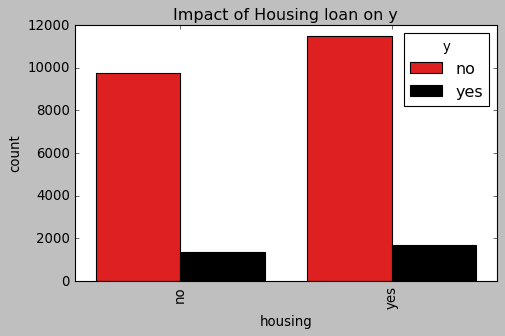

In [5]:
#Analysis of Y dependency on housing loan
plt.style.use("classic")
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.countplot(clean_df['housing'], hue=clean_df["y"], palette=['red','black'] )
plt.title('Impact of Housing loan on y')    
plt.xticks(rotation=90)

In [6]:
#Value count of housing loan
print(clean_df['housing'].value_counts())

yes    13174
no     11131
Name: housing, dtype: int64


In [7]:
#Value count-y dependency on housing loan
pd.crosstab(clean_df['housing'], clean_df['y'])

y,no,yes
housing,,
no,9755,1376
yes,11482,1692


In [8]:
#percentage-housing loan dependency on y
(100*pd.crosstab(clean_df['housing'],clean_df['y'], normalize=0))

y,no,yes
housing,,
no,87.638128,12.361872
yes,87.156520,12.843480


<AxesSubplot:xlabel='housing', ylabel='y'>

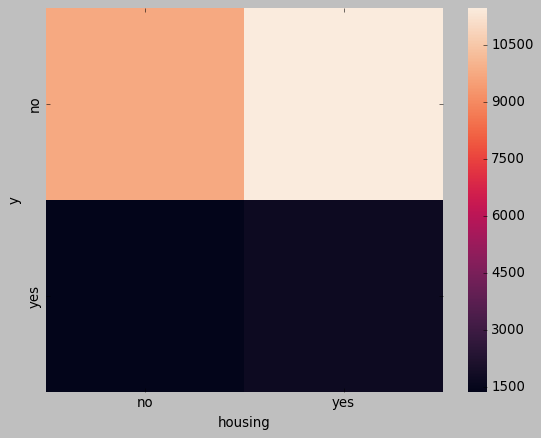

In [9]:
# Heat map for y & housing loan

Housing_y_df1=clean_df.copy()
Housing_y_df=Housing_y_df1[['housing','y']]

ct1_counts = Housing_y_df.groupby(['housing','y']).size()
ct1_counts = ct1_counts.reset_index(name = 'count')
ct1_counts = ct1_counts.pivot(index = 'y', columns = 'housing', values = 'count')

sns.heatmap(ct1_counts)

Analysis

1) More number of customers have housing loans
2) Housing loan doesn't seem to be a priority to check for the subscription to term deposit as we can see that almost equal number customers who have and don't have personal loan did subscription to the term deposit.

C:\Users\binzs\Downloads\Annconda 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

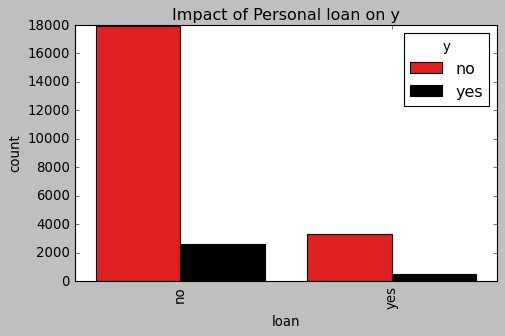

In [10]:
#Analysis of Y dependency on personal loan
plt.style.use("classic")
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.countplot(clean_df['loan'], hue=clean_df["y"], palette=['red','black'] )
plt.title('Impact of Personal loan on y')    
plt.xticks(rotation=90)

In [11]:
#Value-count on personal loan
print(clean_df['loan'].value_counts())

no     20491
yes     3814
Name: loan, dtype: int64


In [12]:
#Value count-y dependency on personal loan
pd.crosstab(clean_df['loan'], clean_df['y'])

y,no,yes
loan,,
no,17904,2587
yes,3333,481


In [13]:
#percentage- personal loan dependency on y
(100*pd.crosstab(clean_df['loan'],clean_df['y'],normalize=0))

y,no,yes
loan,,
no,87.374945,12.625055
yes,87.388568,12.611432


<AxesSubplot:xlabel='loan', ylabel='y'>

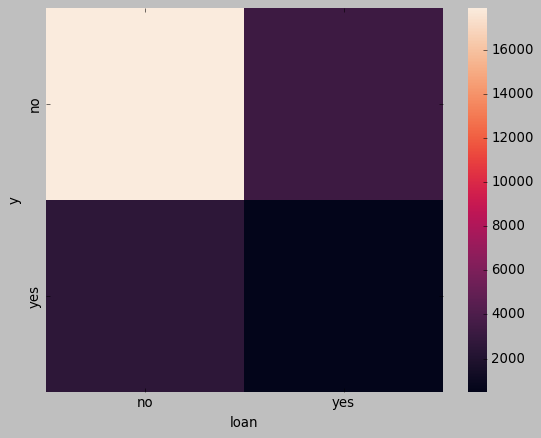

In [14]:
# Heat map for y & personal loan

loan_y_df1=clean_df.copy()
loan_y_df=loan_y_df1[['loan','y']]

ct2_counts = loan_y_df.groupby(['loan','y']).size()
ct2_counts = ct2_counts.reset_index(name = 'count')
ct2_counts = ct2_counts.pivot(index = 'y', columns = 'loan', values = 'count')

sns.heatmap(ct2_counts)

Analysis

1) More number of customers don't have personal loan.
2) More number of coustomers who don't have personal loan also haven't made subscription to the term deposit.
3) Only very few people having a personal loan have subscribed to the term deposits(The logic may be that they already have some existing liability that they need to repay which makes it difficult to arrange money for the subscription to the term deposit)

C:\Users\binzs\Downloads\Annconda 3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

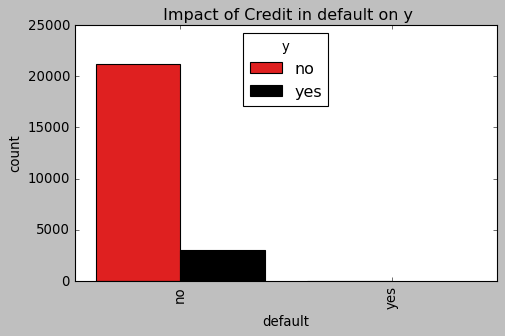

In [15]:
#Analysis of Y dependency on credit in default
plt.style.use("classic")
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.countplot(clean_df['default'], hue=clean_df["y"], palette=['red','black'])
plt.title(' Impact of Credit in default on y')    
plt.xticks(rotation=90)

In [16]:
#Value-count on credit in default
print(clean_df['default'].value_counts())

no     24302
yes        3
Name: default, dtype: int64


In [17]:
#Value count-y dependency on credit in default
pd.crosstab(clean_df['default'], clean_df['y'])

y,no,yes
default,,
no,21234,3068
yes,3,0


In [18]:
#percentage-credit in default dependency on y
(100*pd.crosstab(clean_df['default'],clean_df['y'],normalize=0))

y,no,yes
default,,
no,87.375525,12.624475
yes,100.000000,0.000000


<AxesSubplot:xlabel='default', ylabel='y'>

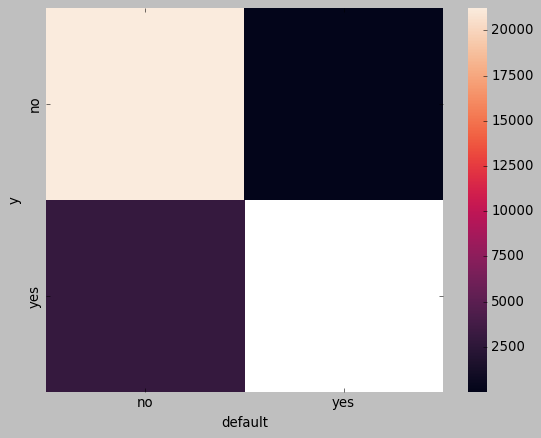

In [19]:
# Heat map for y & personal loan

default_y_df1=clean_df.copy()
default_y_df=default_y_df1[['default','y']]

ct3_counts = default_y_df.groupby(['default','y']).size()
ct3_counts = ct3_counts.reset_index(name = 'count')
ct3_counts = ct3_counts.pivot(index = 'y', columns = 'default', values = 'count')

sns.heatmap(ct3_counts)

Analysis

1) Almost the entire population has not defaulted in their credit.
2) Those people who has not defaulted in their credit seems not to have subscribed to the term deposit.